In [ ]:
!pip install lime --upgrade

In [ ]:
#Defining Location
#Our Data Set Consist of  (bad pose and good pose Images) i.e labelled Data
### Get the data path
from google.colab import drive
drive.mount('/content/drive')
#the drive storage is pelumiabbafemi@gmail.com
loc = r'/content/drive/MyDrive/posture_photos_fmd'
loc_g = r'/content/drive/MyDrive/posture_photos_fmd/good_pose'
loc_b = r'/content/drive/MyDrive/posture_photos_fmd/bad_pose'


#data = DataLoader.from_folder(image_path)

#Split it to training data (60%), validation data (20%, optional) and testing data (20%).
#train_data, rest_data = data.split(0.8)
#validation_data, test_data = rest_data.split(0.5)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os  
#images of good pose
g=os.listdir(loc_g)  #Listdir displays all files in current directory
b=os.listdir(loc_b)  #Listdir displays all files in current directory
print(len(g))
print(len(b))
print(len(g)+len(b))


label=[]   #List for labels
for i in os.listdir(loc_g):    #looping the directory
        label.append('1') #good pose
for j in os.listdir(loc_b):    #looping the directory
        label.append('0') #bad pose
    
print(label)

10772
11387
22159
['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '

In [ ]:
#features we require now
import cv2
features=[]     #list for features
#good_pose
for i in os.listdir(loc_g):
    f=cv2.imread(os.path.join(loc_g,i))  #joining the path of each image in the loop 
    resized_f=cv2.resize(f,(64,64))   #resizing all imgaes to reduce computation and also give each image a dimension
    # .reshape((-1, 64, 64))
    features.append(resized_f)
#bad pose
for i in os.listdir(loc_b):
    f=cv2.imread(os.path.join(loc_b,i))  #joining the path of each image in the loop 
    resized_f=cv2.resize(f,(64,64))   #resizing all imgaes to reduce computation and also give each image a dimension
    features.append(resized_f)

#we got features but its a 4 dimensional array
import numpy as np
np.array(features).shape    #np.array used to convert features into array

(22159, 64, 64, 3)

In [ ]:
#Convering Features and Labels into array so that they can be passed to models
X=np.array(features)
Y=np.array(label).astype(np.uint8)
X=X.reshape(22159,12288)   #converting features of 4 dimensions into d dimensions using reshape function
# X=X.reshape(22159,14700)   #converting features of 4 dimensions into d dimensions using reshape function

In [ ]:
# # make each image color so lime_image works correctly
# X_vec = np.stack([gray2rgb(iimg) for iimg in faces.data.reshape((-1, 64, 64))],0)
# y_vec = faces.target.astype(np.uint8)

In [ ]:
import lime
from lime import lime_image

explainer = lime_image.LimeImageExplainer()

In [ ]:
import tensorflow as tf
import skimage.io as io
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from skimage.segmentation import mark_boundaries

def run_tflite_model(tflite_file, test_image):

    interpreter = tf.lite.Interpreter(model_path=str(tflite_file))
    interpreter.allocate_tensors()
    print(interpreter.get_input_details())
    input_details = interpreter.get_input_details()[0]
    output_details = interpreter.get_output_details()[0]

    interpreter.set_tensor(input_details["index"], test_image)
    interpreter.invoke()
    output = interpreter.get_tensor(output_details["index"])[0]

    prediction = output.argmax()

    return prediction

def predict(test_image):
  tflite_file='/content/sample_data/PosturePicture.tflite'
  interpreter = tf.lite.Interpreter(model_path=str(tflite_file))
  interpreter.allocate_tensors()
  print(interpreter.get_input_details())
  input_details = interpreter.get_input_details()[0]
  output_details = interpreter.get_output_details()[0]
  #print('how come',test_image.shape)
  interpreter.set_tensor(input_details["index"], test_image)
  interpreter.invoke()
  output = interpreter.get_tensor(output_details["index"])[0]
  prediction=[]
  #prediction = 
  prediction.append(output.argmax())
  t=[]
  t.append(prediction)
  return t

In [ ]:
converted_model='/content/sample_data/PosturePicture.tflite'
img_path="/content/sample_data/3829916.jpg" #good pose image
img_path="/content/sample_data/2629916.jpg" #good pose image
img_path="/content/sample_data/402012.jpg" #bad pose image

img = io.imread(img_path)
resized = np.resize(img, (224, 224,3)).astype('uint8')
resized = np.expand_dims(resized, axis=0)
prediction = run_tflite_model(converted_model, resized)
print(prediction)
print(predict(resized))

[{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.uint8'>, 'quantization': (0.003921568859368563, 0), 'quantization_parameters': {'scales': array([0.00392157], dtype=float32), 'zero_points': array([0], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
0
[{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.uint8'>, 'quantization': (0.003921568859368563, 0), 'quantization_parameters': {'scales': array([0.00392157], dtype=float32), 'zero_points': array([0], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
[[0]]


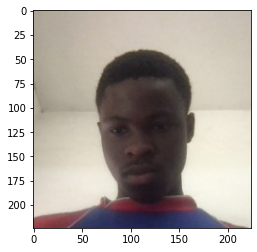

In [ ]:
plt.imshow(resized.reshape(224, 224, 3))
plt.savefig("image1")

  0%|          | 0/1 [00:00<?, ?it/s]

[{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.uint8'>, 'quantization': (0.003921568859368563, 0), 'quantization_parameters': {'scales': array([0.00392157], dtype=float32), 'zero_points': array([0], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:781: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


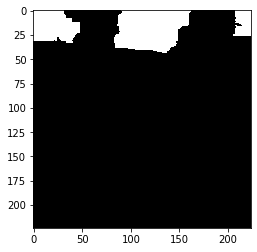

In [ ]:
img = io.imread(img_path)
resized = np.resize(img, (224, 224,3)).astype('uint8')
explanation = explainer.explain_instance(resized, predict, top_labels=5, hide_color=0, num_samples=1)
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=5, hide_rest=True)
plt.imshow(label2rgb(mask,temp, bg_label = 0), interpolation = 'nearest')

#plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.savefig("image1_exp")

Text(0.5, 1.0, 'Positive/Negative Regions for 1')

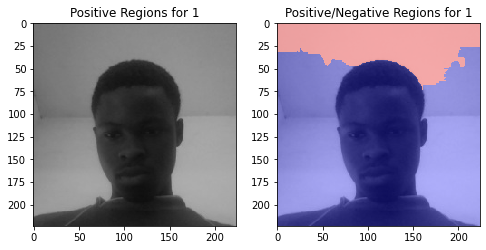

In [ ]:
from skimage.color import label2rgb
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (8, 4))
ax1.imshow(label2rgb(mask,temp, bg_label = 0), interpolation = 'nearest')
ax1.set_title('Positive Regions for {}'.format(Y[0]))
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
ax2.imshow(label2rgb(3-mask,temp, bg_label = 0), interpolation = 'nearest')
ax2.set_title('Positive/Negative Regions for {}'.format(Y[0]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


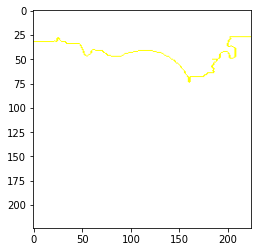

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


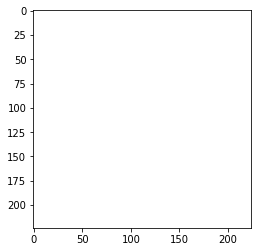

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=1000, hide_rest=False, min_weight=0.2)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

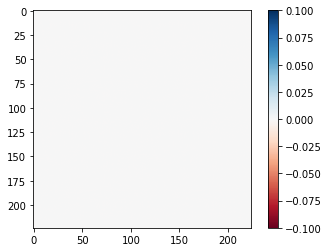

In [ ]:
#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

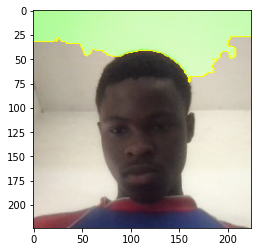

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
img_boundry2 = mark_boundaries(temp/255.0, mask)
plt.imshow(img_boundry2)